In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import networkx as nx
import time
import random
import numpy as np
import pandas as pd
from random import randint
from multiprocessing.pool import Pool
from itertools import combinations
from psutil import Popen, TimeoutExpired
from networkx import Graph
from tempfile import NamedTemporaryFile
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics

In [4]:
df = pd.read_csv('results.csv')

In [5]:
#splitting the data into exp 1 and exp 2
# Experiment 1: Adjacency Matrix and Priority Queue as Array
experiment_1 = df[(df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'array')]

# Experiment 2: Adjacency List and Priority Queue as Heap
experiment_2 = df[(df['graph_adj'] == 'list') & (df['priority_queue'] == 'heap')]

In [6]:
# Display the results
print("Experiment 1 DataFrame:")
print(experiment_1)

Experiment 1 DataFrame:
       Unnamed: 0       ram       time  n_vertex    p_edge graph_adj  \
1               1  20246528  20.590439       400  0.894737    matrix   
9               9  18317312   4.267882       500  0.315789    matrix   
11             11  16523264   1.511641       650  0.000000    matrix   
13             13  27369472  10.922956       700  0.736842    matrix   
14             14  18632704  10.087625       450  0.578947    matrix   
...           ...       ...        ...       ...       ...       ...   
50364       50364  26800128   1.043420       600  1.000000    matrix   
50376       50376  37666816   0.391040       800  1.000000    matrix   
50382       50382  20828160   0.086461       500  0.631579    matrix   
50392       50392  21315584   0.076261       550  0.578947    matrix   
50396       50396  38293504   0.253474      1000  0.578947    matrix   

      priority_queue  trial_i  
1              array        1  
9              array       20  
11             

In [7]:
print("\nExperiment 2 DataFrame:")
print(experiment_2)


Experiment 2 DataFrame:
       Unnamed: 0       ram       time  n_vertex    p_edge graph_adj  \
3               3  47087616  15.416625       850  1.000000      list   
5               5  19660800   9.839412       650  0.210526      list   
6               6  20807680   5.214396       450  0.631579      list   
17             17  22978560   8.439124       750  0.315789      list   
22             22  22290432   0.231745       700  0.315789      list   
...           ...       ...        ...       ...       ...       ...   
50387       50387  52228096   0.114901      1000  0.947368      list   
50388       50388  14757888   0.003108        50  0.368421      list   
50389       50389  15912960   0.005607       450  0.105263      list   
50395       50395  37011456   0.052238       750  0.842105      list   
50399       50399  23662592   0.025386       950  0.210526      list   

      priority_queue  trial_i  
3               heap        8  
5               heap       12  
6             

## Experiment 1: fixing the value of edges, then plotting the graph by varying the values of V and seeing its changes on the CPU_run time

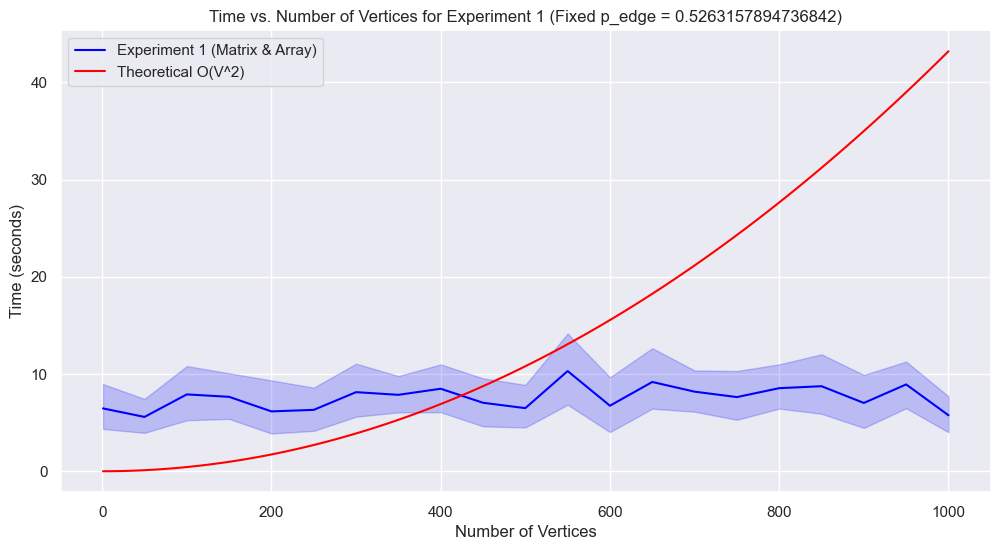

In [8]:
# Fix the value of edges (p_edge)
fixed_p_edge = 0.5263157894736842  # Change this to the desired value

# Experiment 1: Adjacency Matrix and Priority Queue as Array with fixed edges
experiment_1 = df[(df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'array') & (df['p_edge'] == fixed_p_edge)]

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for Experiment 1
sns.lineplot(data=experiment_1, x='n_vertex', y='time', label='Experiment 1 (Matrix & Array)', color='blue')

# Define a range of vertices for the theoretical O(V^2) line
vertex_range = np.linspace(min(experiment_1['n_vertex']), max(experiment_1['n_vertex']), 100)
theoretical_time = vertex_range ** 2 * (max(experiment_1['time']) / (max(vertex_range) ** 2))  # Scale to match the time range

# Plot the theoretical O(V^2) line
plt.plot(vertex_range, theoretical_time, label='Theoretical O(V^2)', color='red', linestyle='-')

# Adding labels and title
plt.title(f'Time vs. Number of Vertices for Experiment 1 (Fixed p_edge = {fixed_p_edge})')
plt.xlabel('Number of Vertices')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Experiment 1: fixing the value of vertexes, then plotting the graph by varying the values of E and seeing its changes on the ram

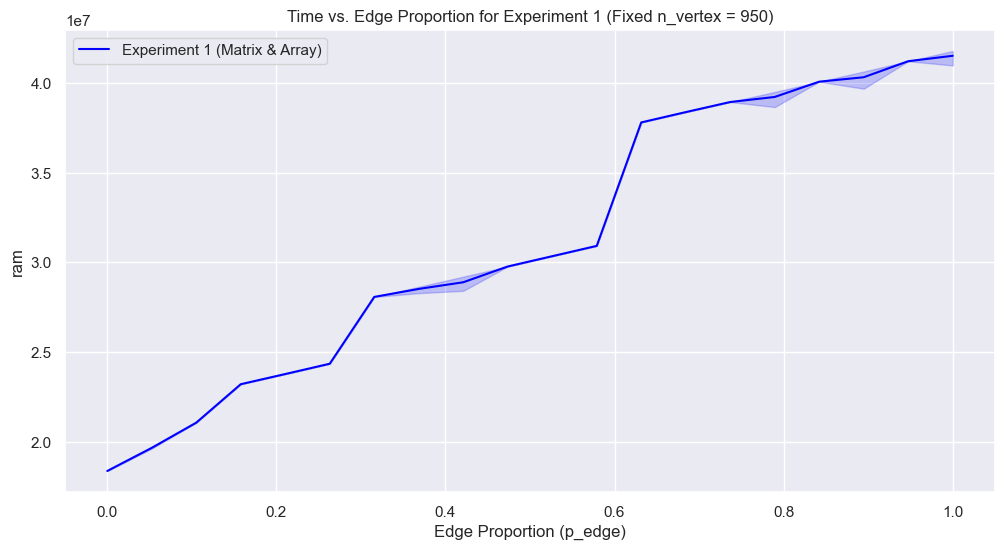

In [9]:
# Fix the number of vertices (n_vertex)
fixed_n_vertex = 950  # Change this to the desired value

# Experiment 1: Adjacency Matrix and Priority Queue as Array with fixed vertices
experiment_1 = df[(df['n_vertex'] == fixed_n_vertex) & (df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'heap')]

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for Experiment 1
sns.lineplot(data=experiment_1, x='p_edge', y='ram', label='Experiment 1 (Matrix & Array)', color='blue')

# Adding labels and title
plt.title(f'Time vs. Edge Proportion for Experiment 1 (Fixed n_vertex = {fixed_n_vertex})')
plt.xlabel('Edge Proportion (p_edge)')
plt.ylabel('ram')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Experiment 2: fixing the value of edges, then plotting the graph by varying the values of V and seeing its changes on the CPU_run time

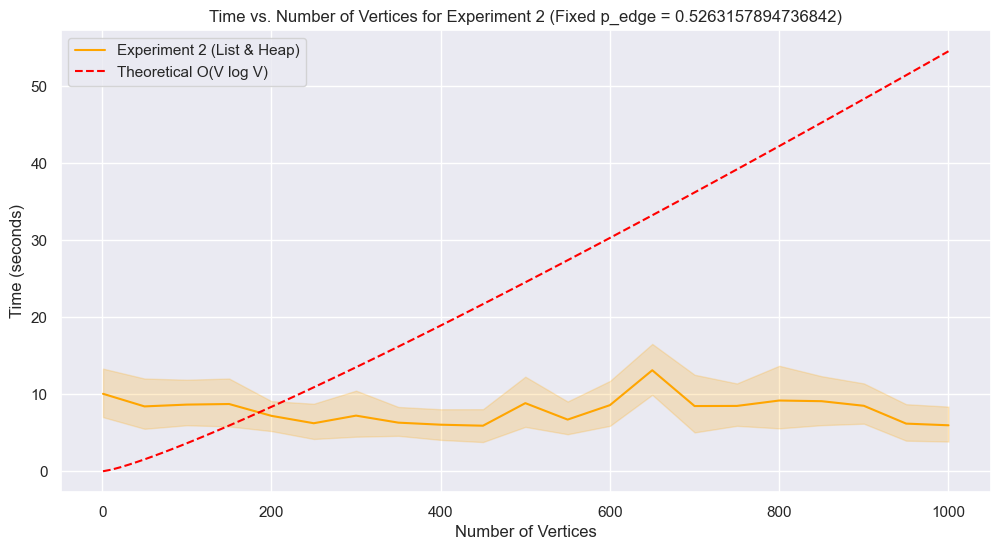

In [10]:
# Fix the value of edges (p_edge)
fixed_p_edge = 0.5263157894736842  # Change this to the desired value

# Experiment 2: Adjacency List and Priority Queue as Heap with fixed edges
experiment_2 = df[(df['graph_adj'] == 'list') & (df['priority_queue'] == 'heap') & (df['p_edge'] == fixed_p_edge)]

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for Experiment 2
sns.lineplot(data=experiment_2, x='n_vertex', y='time', label='Experiment 2 (List & Heap)', color='orange')

# Define a range of vertices for the theoretical O(V log V) line
vertex_range = np.linspace(min(experiment_2['n_vertex']), max(experiment_2['n_vertex']), 100)
theoretical_time = vertex_range * np.log2(vertex_range) * (max(experiment_2['time']) / (max(vertex_range) * np.log2(max(vertex_range))))  # Scale to match the time range

# Plot the theoretical O(V log V) line
plt.plot(vertex_range, theoretical_time, label='Theoretical O(V log V)', color='red', linestyle='--')

# Adding labels and title
plt.title(f'Time vs. Number of Vertices for Experiment 2 (Fixed p_edge = {fixed_p_edge})')
plt.xlabel('Number of Vertices')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Experiment 2: fixing the value of vertexes, then plotting the graph by varying the values of E and seeing its changes on the ram

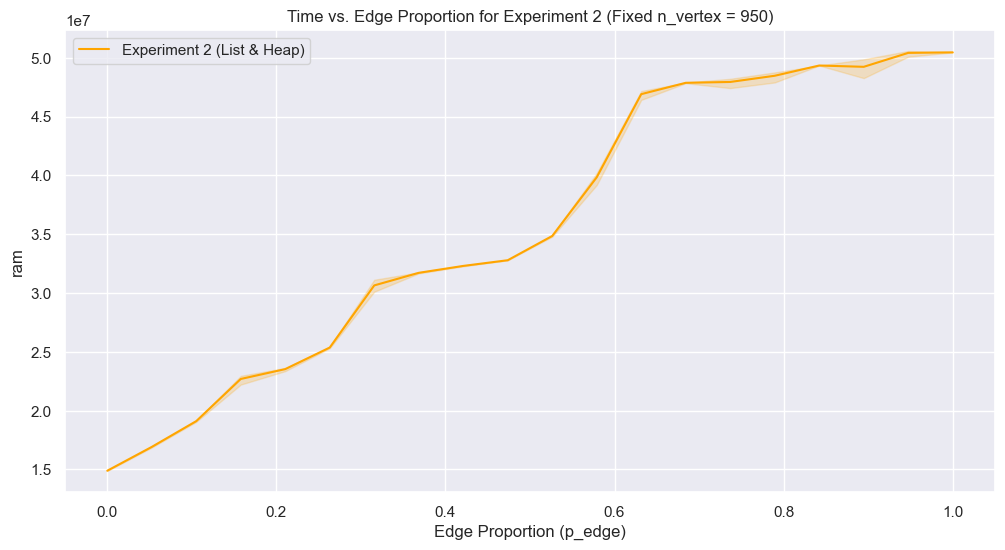

In [11]:
# Fix the number of vertices (n_vertex)
fixed_n_vertex = 950  # Change this to the desired value

# Experiment 2: Adjacency List and Priority Queue as Heap with fixed vertices
experiment_2 = df[(df['n_vertex'] == fixed_n_vertex) & (df['graph_adj'] == 'list') & (df['priority_queue'] == 'heap')]

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for Experiment 2
sns.lineplot(data=experiment_2, x='p_edge', y='ram', label='Experiment 2 (List & Heap)', color='orange')

# Adding labels and title
plt.title(f'Time vs. Edge Proportion for Experiment 2 (Fixed n_vertex = {fixed_n_vertex})')
plt.xlabel('Edge Proportion (p_edge)')
plt.ylabel('ram')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Comparing the RAM vs the edges for a fixed vertex of 950

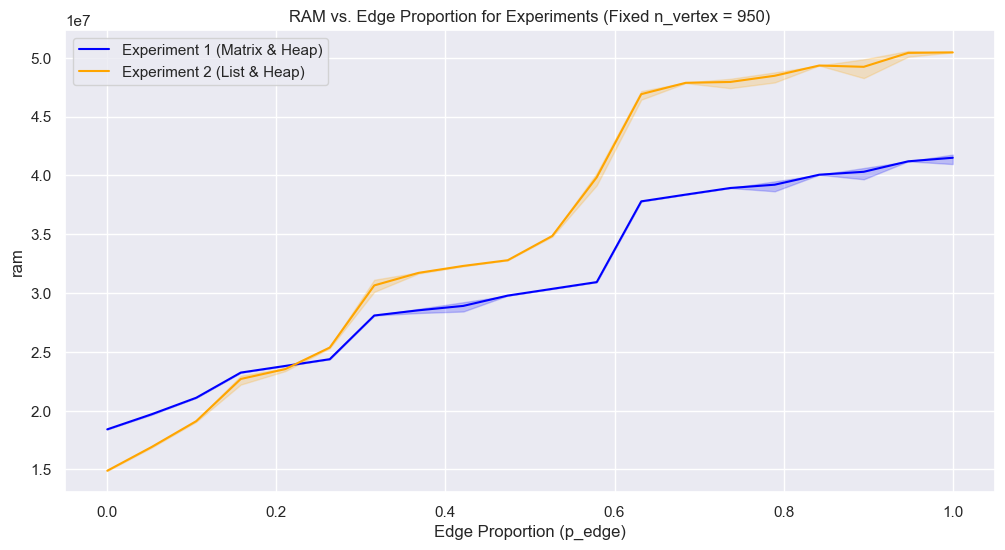

In [12]:
# Fix the number of vertices (n_vertex)
fixed_n_vertex = 950  # Change this to the desired value

# Experiment 1: Adjacency Matrix and Priority Queue as Array with fixed vertices
experiment_1 = df[(df['n_vertex'] == fixed_n_vertex) & (df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'heap')]

# Experiment 2: Adjacency List and Priority Queue as Heap with fixed vertices
experiment_2 = df[(df['n_vertex'] == fixed_n_vertex) & (df['graph_adj'] == 'list') & (df['priority_queue'] == 'heap')]

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for Experiment 1
sns.lineplot(data=experiment_1, x='p_edge', y='ram', label='Experiment 1 (Matrix & Heap)', color='blue')

# Line plot for Experiment 2
sns.lineplot(data=experiment_2, x='p_edge', y='ram', label='Experiment 2 (List & Heap)', color='orange')

# Adding labels and title
plt.title(f'RAM vs. Edge Proportion for Experiments (Fixed n_vertex = {fixed_n_vertex})')
plt.xlabel('Edge Proportion (p_edge)')
plt.ylabel('ram')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Comparing RAM vs the vertexes for a fixed edge

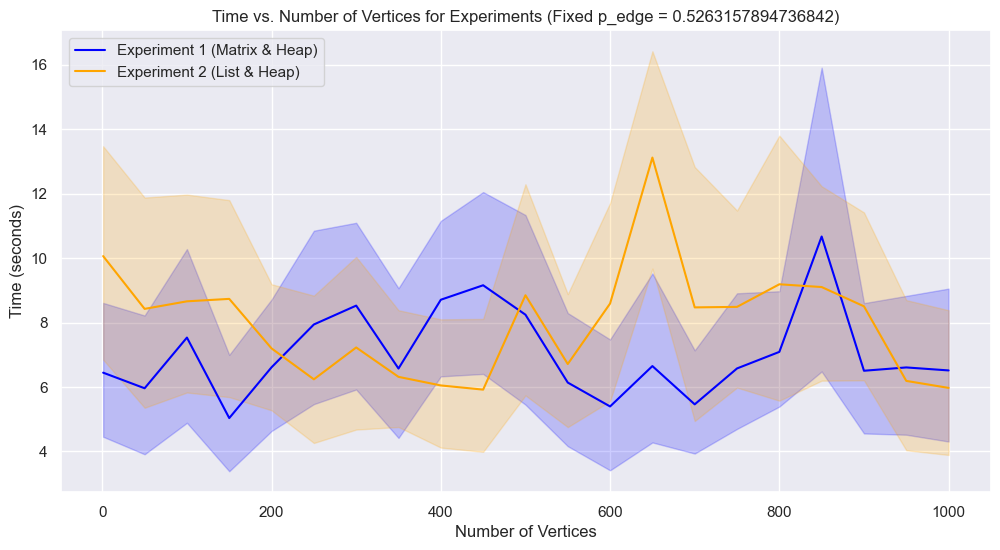

In [13]:
# Fix the value of edges (p_edge)
fixed_p_edge = 0.5263157894736842  # Change this to the desired value

# Experiment 1: Adjacency Matrix and Priority Queue as Array with fixed edges
experiment_1 = df[(df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'heap') & (df['p_edge'] == fixed_p_edge)]

# Experiment 2: Adjacency List and Priority Queue as Heap with fixed edges
experiment_2 = df[(df['graph_adj'] == 'list') & (df['priority_queue'] == 'heap') & (df['p_edge'] == fixed_p_edge)]

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for Experiment 1
sns.lineplot(data=experiment_1, x='n_vertex', y='time', label='Experiment 1 (Matrix & Heap)', color='blue')

# Line plot for Experiment 2
sns.lineplot(data=experiment_2, x='n_vertex', y='time', label='Experiment 2 (List & Heap)', color='orange')

# Adding labels and title
plt.title(f'Time vs. Number of Vertices for Experiments (Fixed p_edge = {fixed_p_edge})')
plt.xlabel('Number of Vertices')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## combining the two graphs tgt for denser graph 

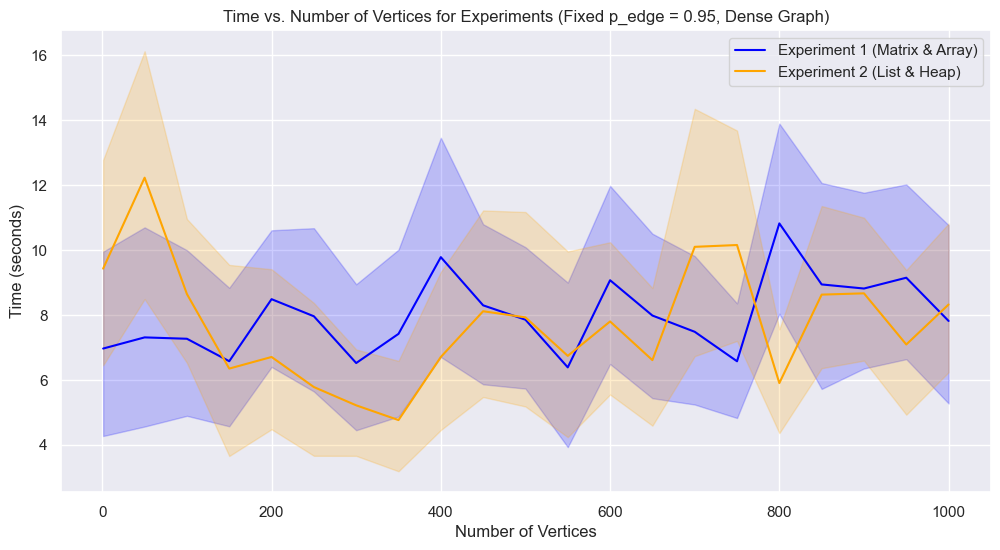

In [14]:
# Fix the value of edges for a dense graph
fixed_p_edge = 0.95  # More rounded value

# Experiment 1: Adjacency Matrix and Priority Queue as Array with fixed edges
experiment_1 = df[(df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'array') & (df['p_edge'].between(fixed_p_edge - 0.01, fixed_p_edge + 0.01))]

# Experiment 2: Adjacency List and Priority Queue as Heap with fixed edges
experiment_2 = df[(df['graph_adj'] == 'list') & (df['priority_queue'] == 'heap') & (df['p_edge'].between(fixed_p_edge - 0.01, fixed_p_edge + 0.01))]

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for Experiment 1
sns.lineplot(data=experiment_1, x='n_vertex', y='time', label='Experiment 1 (Matrix & Array)', color='blue')

# Line plot for Experiment 2
sns.lineplot(data=experiment_2, x='n_vertex', y='time', label='Experiment 2 (List & Heap)', color='orange')

# Adding labels and title
plt.title(f'Time vs. Number of Vertices for Experiments (Fixed p_edge = {fixed_p_edge}, Dense Graph)')
plt.xlabel('Number of Vertices')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Dense graph for fixed vertex and time vs edges 

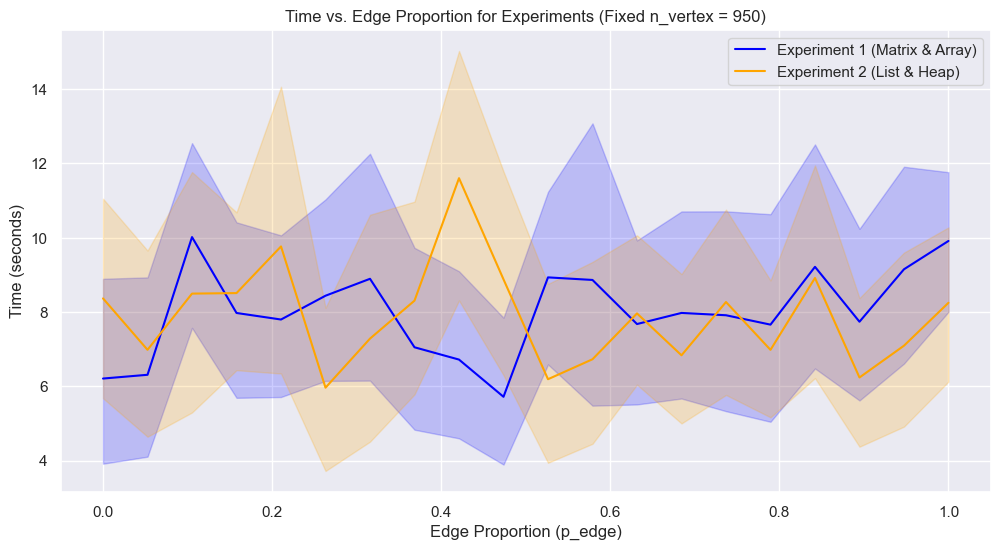

In [15]:
# Fix the number of vertices (n_vertex) to a large value
fixed_n_vertex = 950  # Fixed large number of vertices

# Experiment 1: Adjacency Matrix and Priority Queue as Array with fixed vertices
experiment_1 = df[(df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'array') & (df['n_vertex'] == fixed_n_vertex)]

# Experiment 2: Adjacency List and Priority Queue as Heap with fixed vertices
experiment_2 = df[(df['graph_adj'] == 'list') & (df['priority_queue'] == 'heap') & (df['n_vertex'] == fixed_n_vertex)]

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for Experiment 1
sns.lineplot(data=experiment_1, x='p_edge', y='time', label='Experiment 1 (Matrix & Array)', color='blue')

# Line plot for Experiment 2
sns.lineplot(data=experiment_2, x='p_edge', y='time', label='Experiment 2 (List & Heap)', color='orange')

# Adding labels and title
plt.title(f'Time vs. Edge Proportion for Experiments (Fixed n_vertex = {fixed_n_vertex})')
plt.xlabel('Edge Proportion (p_edge)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
